1 Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' # set 'png' here when working on notebook
%matplotlib inline

Carregando os dados

In [2]:
train = pd.read_csv("data/eleicoes_2006_TREINO_CONFIGURADO_LIBRE.csv", index_col="nome")
del train['sequencial_candidato']
del train['cargo']

test = pd.read_csv("data/eleicoes_2010_TESTE_CONFIGURADO_LIBRE.csv", index_col="nome")
del test['sequencial_candidato']
del test['cargo']

all_data = pd.concat((train.loc[:,'ano':'votos'], test.loc[:,'ano':'votos']))

In [3]:
train.describe()

,ano,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,votos
count,3388.0,3388.000000,3388.000000,3.227000e+03,3.227000e+03,1879.000000,2.144000e+03,1.652000e+03,2.380000e+03,3388.000000,3388.000000,3.388000e+03,3.388000e+03,3388.000000
mean,2006.0,22.863046,21.215171,9.555843e+04,2.342274e+05,13972.282230,2.897995e+04,1.336408e+05,2.955152e+04,103.485242,85.420012,1.045784e+05,5.036312e+04,23205.050767
std,0.0,45.205983,41.966850,2.281748e+05,1.708410e+06,46835.847354,5.958718e+04,2.640834e+05,1.085256e+05,276.161213,217.258935,2.388083e+05,3.137079e+05,45723.243088
min,2006.0,1.000000,1.000000,0.000000e+00,0.000000e+00,2.410000,3.000000e-02,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,2.000000
25%,2006.0,3.000000,3.000000,2.176850e+03,6.064583e+02,1000.000000,1.797500e+03,3.000000e+03,1.011750e+03,7.000000,6.000000,2.303650e+03,3.433723e+02,1077.500000
50%,2006.0,8.000000,8.000000,1.023500e+04,1.675000e+03,2800.000000,8.000000e+03,2.020000e+04,4.424500e+03,24.000000,21.000000,1.127265e+04,7.367874e+02,3606.500000
75%,2006.0,22.000000,20.000000,6.651200e+04,5.965018e+03,9361.025000,3.091750e+04,1.453170e+05,2.000000e+04,84.250000,71.250000,8.379567e+04,1.615096e+03,23399.000000
max,2006.0,639.000000,595.000000,2.620860e+06,3.777188e+07,672000.000000,1.381000e+06,2.324000e+06,2.638000e+06,5545.000000,3384.000000,2.684085e+06,7.654205e+06,739827.000000


In [4]:
train

,ano,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,2006,AP,PT,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.00,14,14,16583.60,1184.542857,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
LOIVA DE OLIVEIRA,2006,RO,PT,13,13,22826.00,1755.846154,6625.00,15000.0,1000.00,201.00,24,23,20325.99,883.738696,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
MARIA DALVA DE SOUZA FIGUEIREDO,2006,AP,PT,17,16,148120.80,9257.550000,2250.00,34150.0,62220.80,59500.00,123,108,146011.70,1351.960185,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
ROMALDO MILANI,2006,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.00,8,8,3001.12,375.140000,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
ANSELMO DE JESUS ABREU,2006,RO,PT,48,48,NaN,NaN,NaN,50878.0,NaN,68942.00,133,120,116416.64,970.138667,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JOSÉ CORDEIRO DA SILVA,2006,SP,PTC,5,5,1612.27,322454.000000,777.00,NaN,NaN,NaN,5,5,1612.27,322454.000000,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO CIVIL APOSENTADO,1813
WALTER AUGUSTO FRANCINI JUNIOR,2006,SP,PPS,4,4,1585.30,396325.000000,1285.30,NaN,NaN,300.00,4,4,1585.30,396325.000000,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),COMERCIANTE,808
SILVIO ROJES FILHO,2006,SP,PTB,2,2,831.03,415515.000000,NaN,NaN,NaN,831.03,3,3,831.03,277.010000,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PRODUTOR AGROPECUÁRIO,1971


In [5]:
train.columns

Index(['ano', 'uf', 'partido', 'quantidade_doacoes', 'quantidade_doadores',
       'total_receita', 'media_receita',
       'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas',
       'recursos_de_pessoas_juridicas', 'recursos_proprios',
       'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa',
       'media_despesa', 'sexo', 'grau', 'estado_civil', 'ocupacao', 'votos'],
      dtype='object')

In [6]:
test

,ano,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,,
ANTONIA LUCILEIA CRUZ RAMOS CAMARA,2010,AC,PSC,36,35,406891.92,11625.483429,269179.61,58450.00,7526.8,95135.51,54,48,381881.55,7955.865625,FEMININO,SUPERIOR COMPLETO,CASADO(A),EMPRESÁRIO,15849
DEODATO NUNES DE FRANÇA,2010,AC,PMDB,3,3,6990.00,2330.000000,NaN,NaN,5490.0,1500.00,3,3,6990.00,2330.000000,MASCULINO,SUPERIOR COMPLETO,CASADO(A),OUTROS,4620
EDSON FIRMINO DE PAULA,2010,AC,PSDB,3,3,1840.00,613.333333,290.00,1500.00,NaN,50.00,3,3,1840.00,613.333333,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),"OPERADOR DE EQUIPAMENTO DE RÁDIO, TELEVISÃO, S...",312
ELISABETH APARECIDA GARCIA RODRIGUES,2010,AC,PSDB,1,1,440.00,440.000000,440.00,NaN,NaN,NaN,1,1,440.00,440.000000,FEMININO,SUPERIOR COMPLETO,CASADO(A),PROFESSOR DE ENSINO MÉDIO,1357
FLAVIANO FLAVIO BAPTISTA DE MELO,2010,AC,PMDB,15,13,241500.00,18576.923077,NaN,6100.00,66200.0,10900.00,83,59,232677.64,3943.688814,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),DEPUTADO,36301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROBERTO PEREIRA URBANO,2010,TO,PSC,3,3,3370.00,1123.333333,370.00,NaN,NaN,3000.00,16,16,3363.41,210.213125,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,3013
RONALDO DIMAS NOGUEIRA PEREIRA,2010,TO,PR,715,706,1034323.16,1465.046969,211804.58,431518.58,173500.0,28500.00,1658,1275,815638.26,639.716282,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,35980
SÉRGIO PERIN,2010,TO,PTB,2,2,2600.00,1300.000000,NaN,NaN,NaN,600.00,2,2,2600.00,1300.000000,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),ODONTÓLOGO,20


In [7]:
all_data

,ano,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao,votos
nome,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,2006,AP,PT,6,6,16600.00,2766.666667,NaN,9000.00,6300.00,1300.00,14,14,16583.60,1184.542857,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
LOIVA DE OLIVEIRA,2006,RO,PT,13,13,22826.00,1755.846154,6625.00,15000.00,1000.00,201.00,24,23,20325.99,883.738696,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
MARIA DALVA DE SOUZA FIGUEIREDO,2006,AP,PT,17,16,148120.80,9257.550000,2250.00,34150.00,62220.80,59500.00,123,108,146011.70,1351.960185,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
ROMALDO MILANI,2006,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.00,1101.12,750.00,8,8,3001.12,375.140000,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
ANSELMO DE JESUS ABREU,2006,RO,PT,48,48,NaN,NaN,NaN,50878.00,NaN,68942.00,133,120,116416.64,970.138667,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROBERTO PEREIRA URBANO,2010,TO,PSC,3,3,3370.00,1123.333333,370.00,NaN,NaN,3000.00,16,16,3363.41,210.213125,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,3013
RONALDO DIMAS NOGUEIRA PEREIRA,2010,TO,PR,715,706,1034323.16,1465.046969,211804.58,431518.58,173500.00,28500.00,1658,1275,815638.26,639.716282,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,35980
SÉRGIO PERIN,2010,TO,PTB,2,2,2600.00,1300.000000,NaN,NaN,NaN,600.00,2,2,2600.00,1300.000000,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),ODONTÓLOGO,20


Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.

Normalização: First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

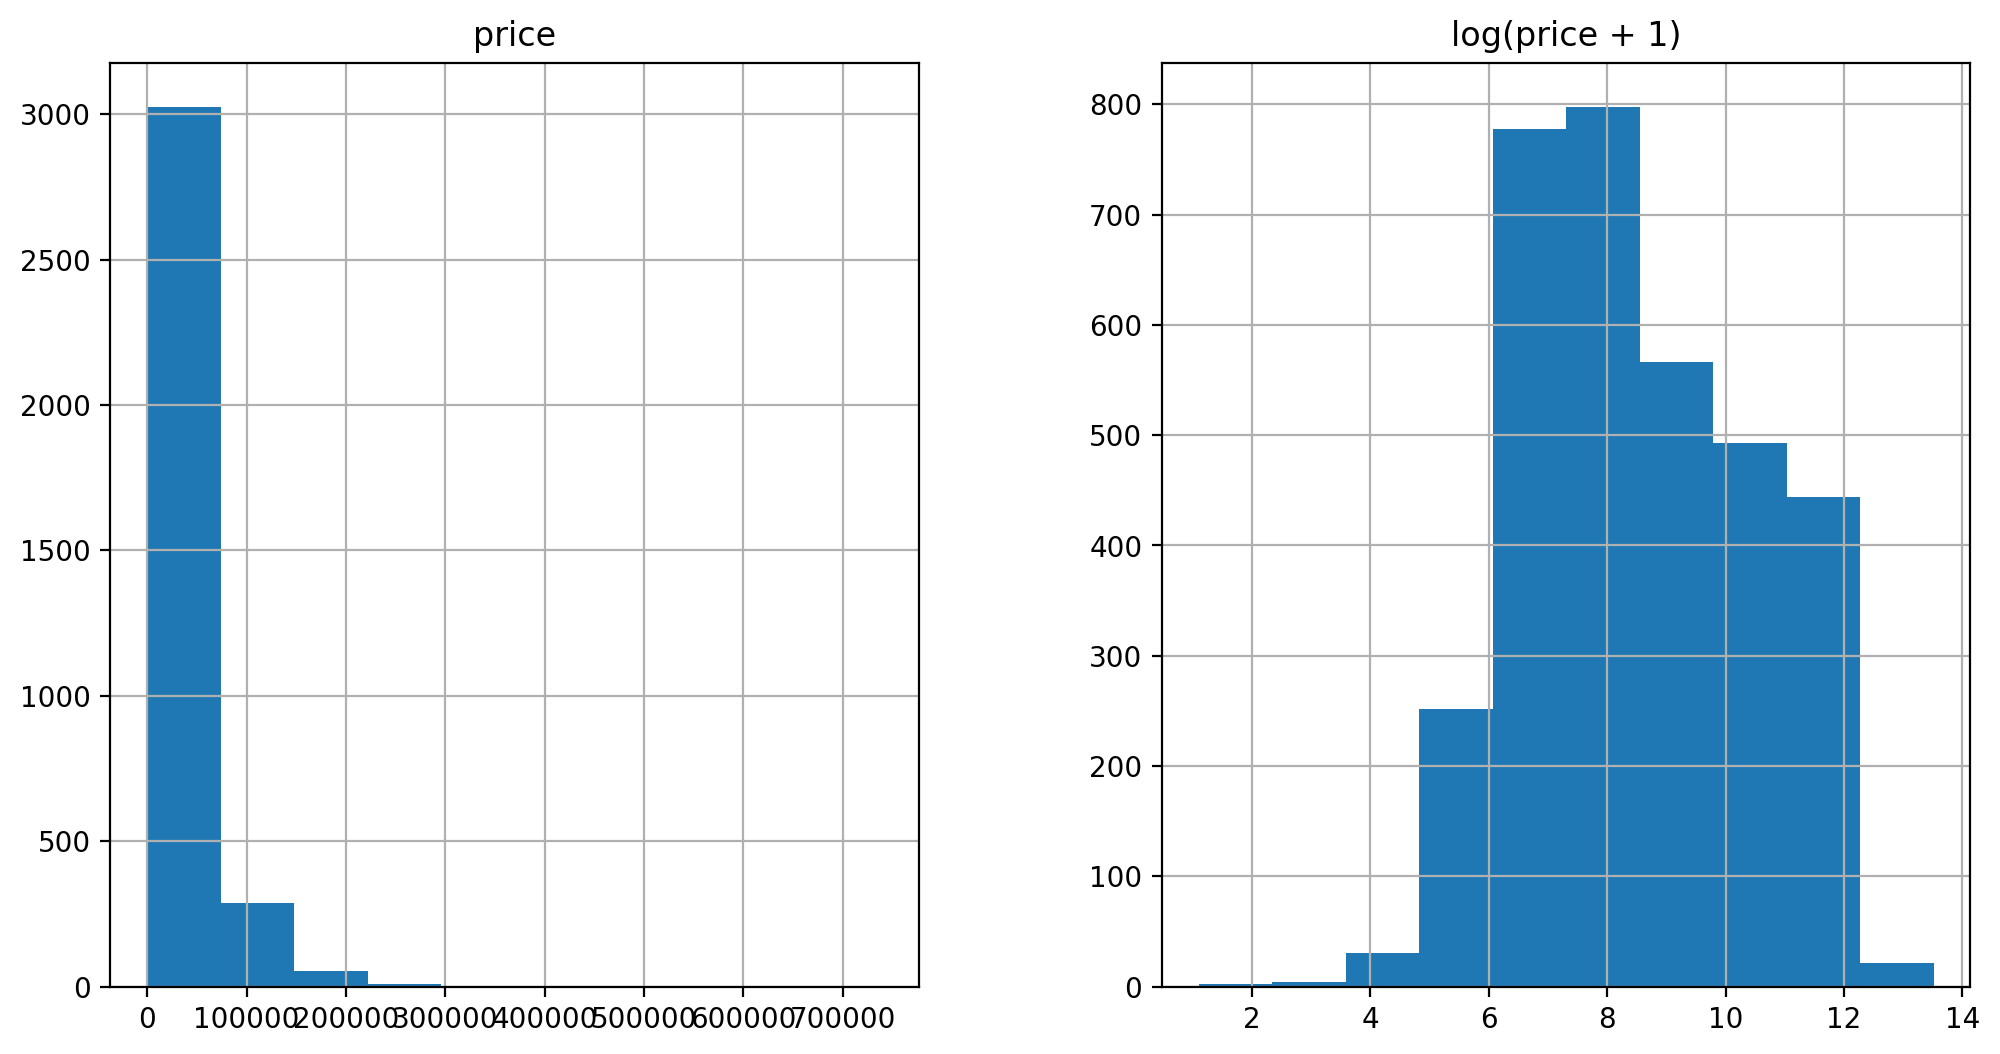

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame(
    {
        "price" : train["votos"], 
         "log(price + 1)" : np.log1p(train["votos"])
    }
)
prices.hist()

In [9]:
# log transform the target
train["votos"] = np.log1p(train["votos"])

In [10]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [11]:
all_data.dtypes != "object"

ano                                       True
uf                                       False
partido                                  False
quantidade_doacoes                        True
quantidade_doadores                       True
total_receita                             True
media_receita                             True
recursos_de_outros_candidatos/comites     True
recursos_de_pessoas_fisicas               True
recursos_de_pessoas_juridicas             True
recursos_proprios                         True
quantidade_despesas                       True
quantidade_fornecedores                   True
total_despesa                             True
media_despesa                             True
sexo                                     False
grau                                     False
estado_civil                             False
ocupacao                                 False
votos                                     True
dtype: bool

Tratamento de valores ausentes: Create Dummy variables for the categorical features Replace the numeric missing values (NaN's) with the mean of their respective columns

In [12]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [13]:
all_data

,ano,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
nome,,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,2006,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,2.708050,...,0,0,0,0,0,0,1,0,0,0
LOIVA DE OLIVEIRA,2006,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,...,0,0,0,0,0,0,0,0,0,0
MARIA DALVA DE SOUZA FIGUEIREDO,2006,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,...,0,0,0,0,0,0,0,0,0,0
ROMALDO MILANI,2006,1.945910,1.945910,8.007074,6.216979,8.324939,7.048386,7.004991,6.621406,2.197225,...,0,0,0,0,0,0,0,0,0,0
ANSELMO DE JESUS ABREU,2006,3.891820,3.891820,9.634619,8.035248,8.324939,10.837206,10.011960,11.141035,4.897840,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROBERTO PEREIRA URBANO,2010,1.386294,1.386294,8.122965,7.024946,5.916202,8.984406,10.011960,8.006701,2.833213,...,0,0,0,0,0,0,0,0,0,0
RONALDO DIMAS NOGUEIRA PEREIRA,2010,6.573680,6.561031,13.849259,7.290325,12.263424,12.975068,12.063939,10.257694,7.413970,...,0,0,0,0,0,0,0,0,0,0
SÉRGIO PERIN,2010,1.098612,1.098612,7.863651,7.170888,8.324939,8.984406,10.011960,6.398595,1.098612,...,0,0,0,0,0,0,0,0,0,0


In [14]:
all_data.describe()

,ano,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
count,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,...,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000
mean,2008.151160,2.466152,2.399197,9.634619,8.035248,8.324939,8.984406,10.011960,8.431020,3.277922,...,0.000409,0.000546,0.000136,0.000955,0.003001,0.004093,0.044475,0.002183,0.002729,0.000136
std,1.994416,1.188924,1.166340,2.347201,2.299945,1.559701,1.603865,1.700940,1.826690,1.698871,...,0.020228,0.023355,0.011680,0.030890,0.054706,0.063848,0.206161,0.046673,0.052167,0.011680
min,2006.000000,0.693147,0.693147,0.000000,0.000000,1.226712,0.029559,0.000000,0.000000,0.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,1.609438,1.609438,7.941296,6.584600,7.625351,8.489513,10.011960,7.797096,1.945910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,2.302585,2.197225,9.475585,7.601402,8.324939,8.984406,10.011960,8.431020,3.091042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,3.218876,3.135494,11.340241,8.855292,8.761486,9.717068,10.011960,9.210440,4.430817,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2010.000000,8.853380,8.665786,15.328378,18.823669,15.114122,14.154159,14.971834,15.524903,9.203618,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
all_data.head()

,ano,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
nome,,,,,,,,,,,,,,,,,,,,,
JOSÉ LUIZ NOGUEIRA DE SOUSA,2006,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,2.708050,...,0,0,0,0,0,0,1,0,0,0
LOIVA DE OLIVEIRA,2006,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,...,0,0,0,0,0,0,0,0,0,0
MARIA DALVA DE SOUZA FIGUEIREDO,2006,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,...,0,0,0,0,0,0,0,0,0,0
ROMALDO MILANI,2006,1.945910,1.945910,8.007074,6.216979,8.324939,7.048386,7.004991,6.621406,2.197225,...,0,0,0,0,0,0,0,0,0,0
ANSELMO DE JESUS ABREU,2006,3.891820,3.891820,9.634619,8.035248,8.324939,10.837206,10.011960,11.141035,4.897840,...,0,0,0,0,0,0,0,0,0,0


Construir modelos de regressão com (ridge e lasso) e sem regularização.

Models Now we are going to use regularized linear regression models from scikit learn module. I'm going to try both l_1 (lasso) and l_2 (Ridge) regularization. I'll also define a function that returns the cross-validation rmse error we can evaluate our models and pick the best tuning par.

In [16]:
# creating matrices for sklearn
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.votos

In [17]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 5 ))
    return (rmse)

model_rodge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexibe our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [18]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv (Ridge (alpha = alpha)).mean() for alpha in alphas]

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexibe our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

Text(0, 0.5, 'rmse')

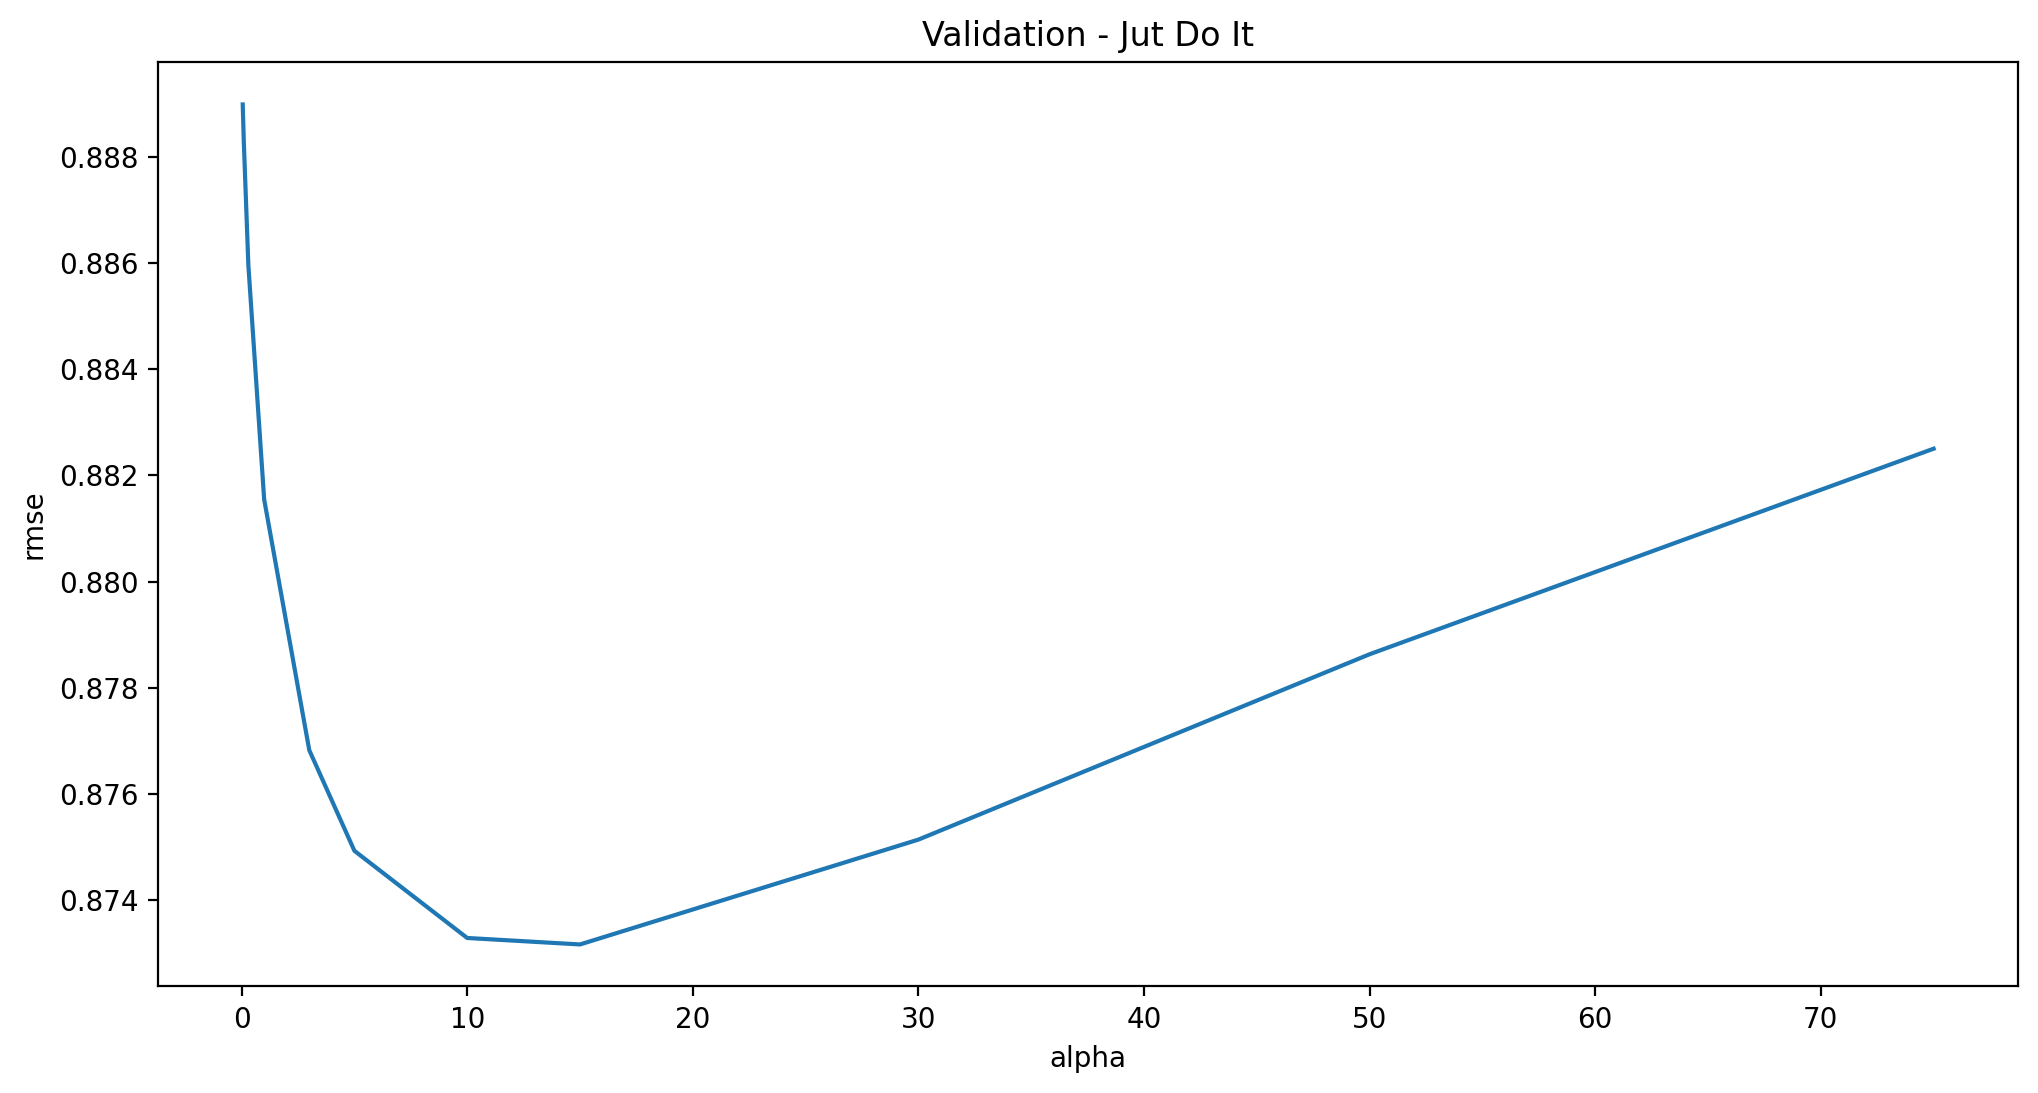

In [19]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Jut Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexibe (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot abova.

In [20]:
cv_ridge.min()

0.873167520102528

So for the Ridge regression we get a rmsle of about 0.87 Let's try out the Lasso model. We will do a slightly different approach here and use the buil in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge

In [21]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], max_iter=60000000).fit(X_train, y)

In [22]:
rmse_cv(model_lasso).mean()

0.8744012585232038

Nice! The lasso performs even better so we'll just use this one predict on the test set. Another neat thing about the Lasso is that is tt dows feature selection for you - setting coeficientes of feature it deems unimportant to zero. Let's take a look at the coefficients.

In [23]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [24]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef ==0)) + " variables") 

Lasso picked 98 variables and eliminated the other 163 variables


Googd job Lasso. One thing to note here however is that the features selected ae not necessarily the "correct" ones - especialy since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on bootstrapped samples and see how stable the feature selection is.

We can also take a look directly at what the most importatn coeffcicients are:

In [25]:
imp_coef = pd.concat([coef.sort_values().head(10),
                      coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

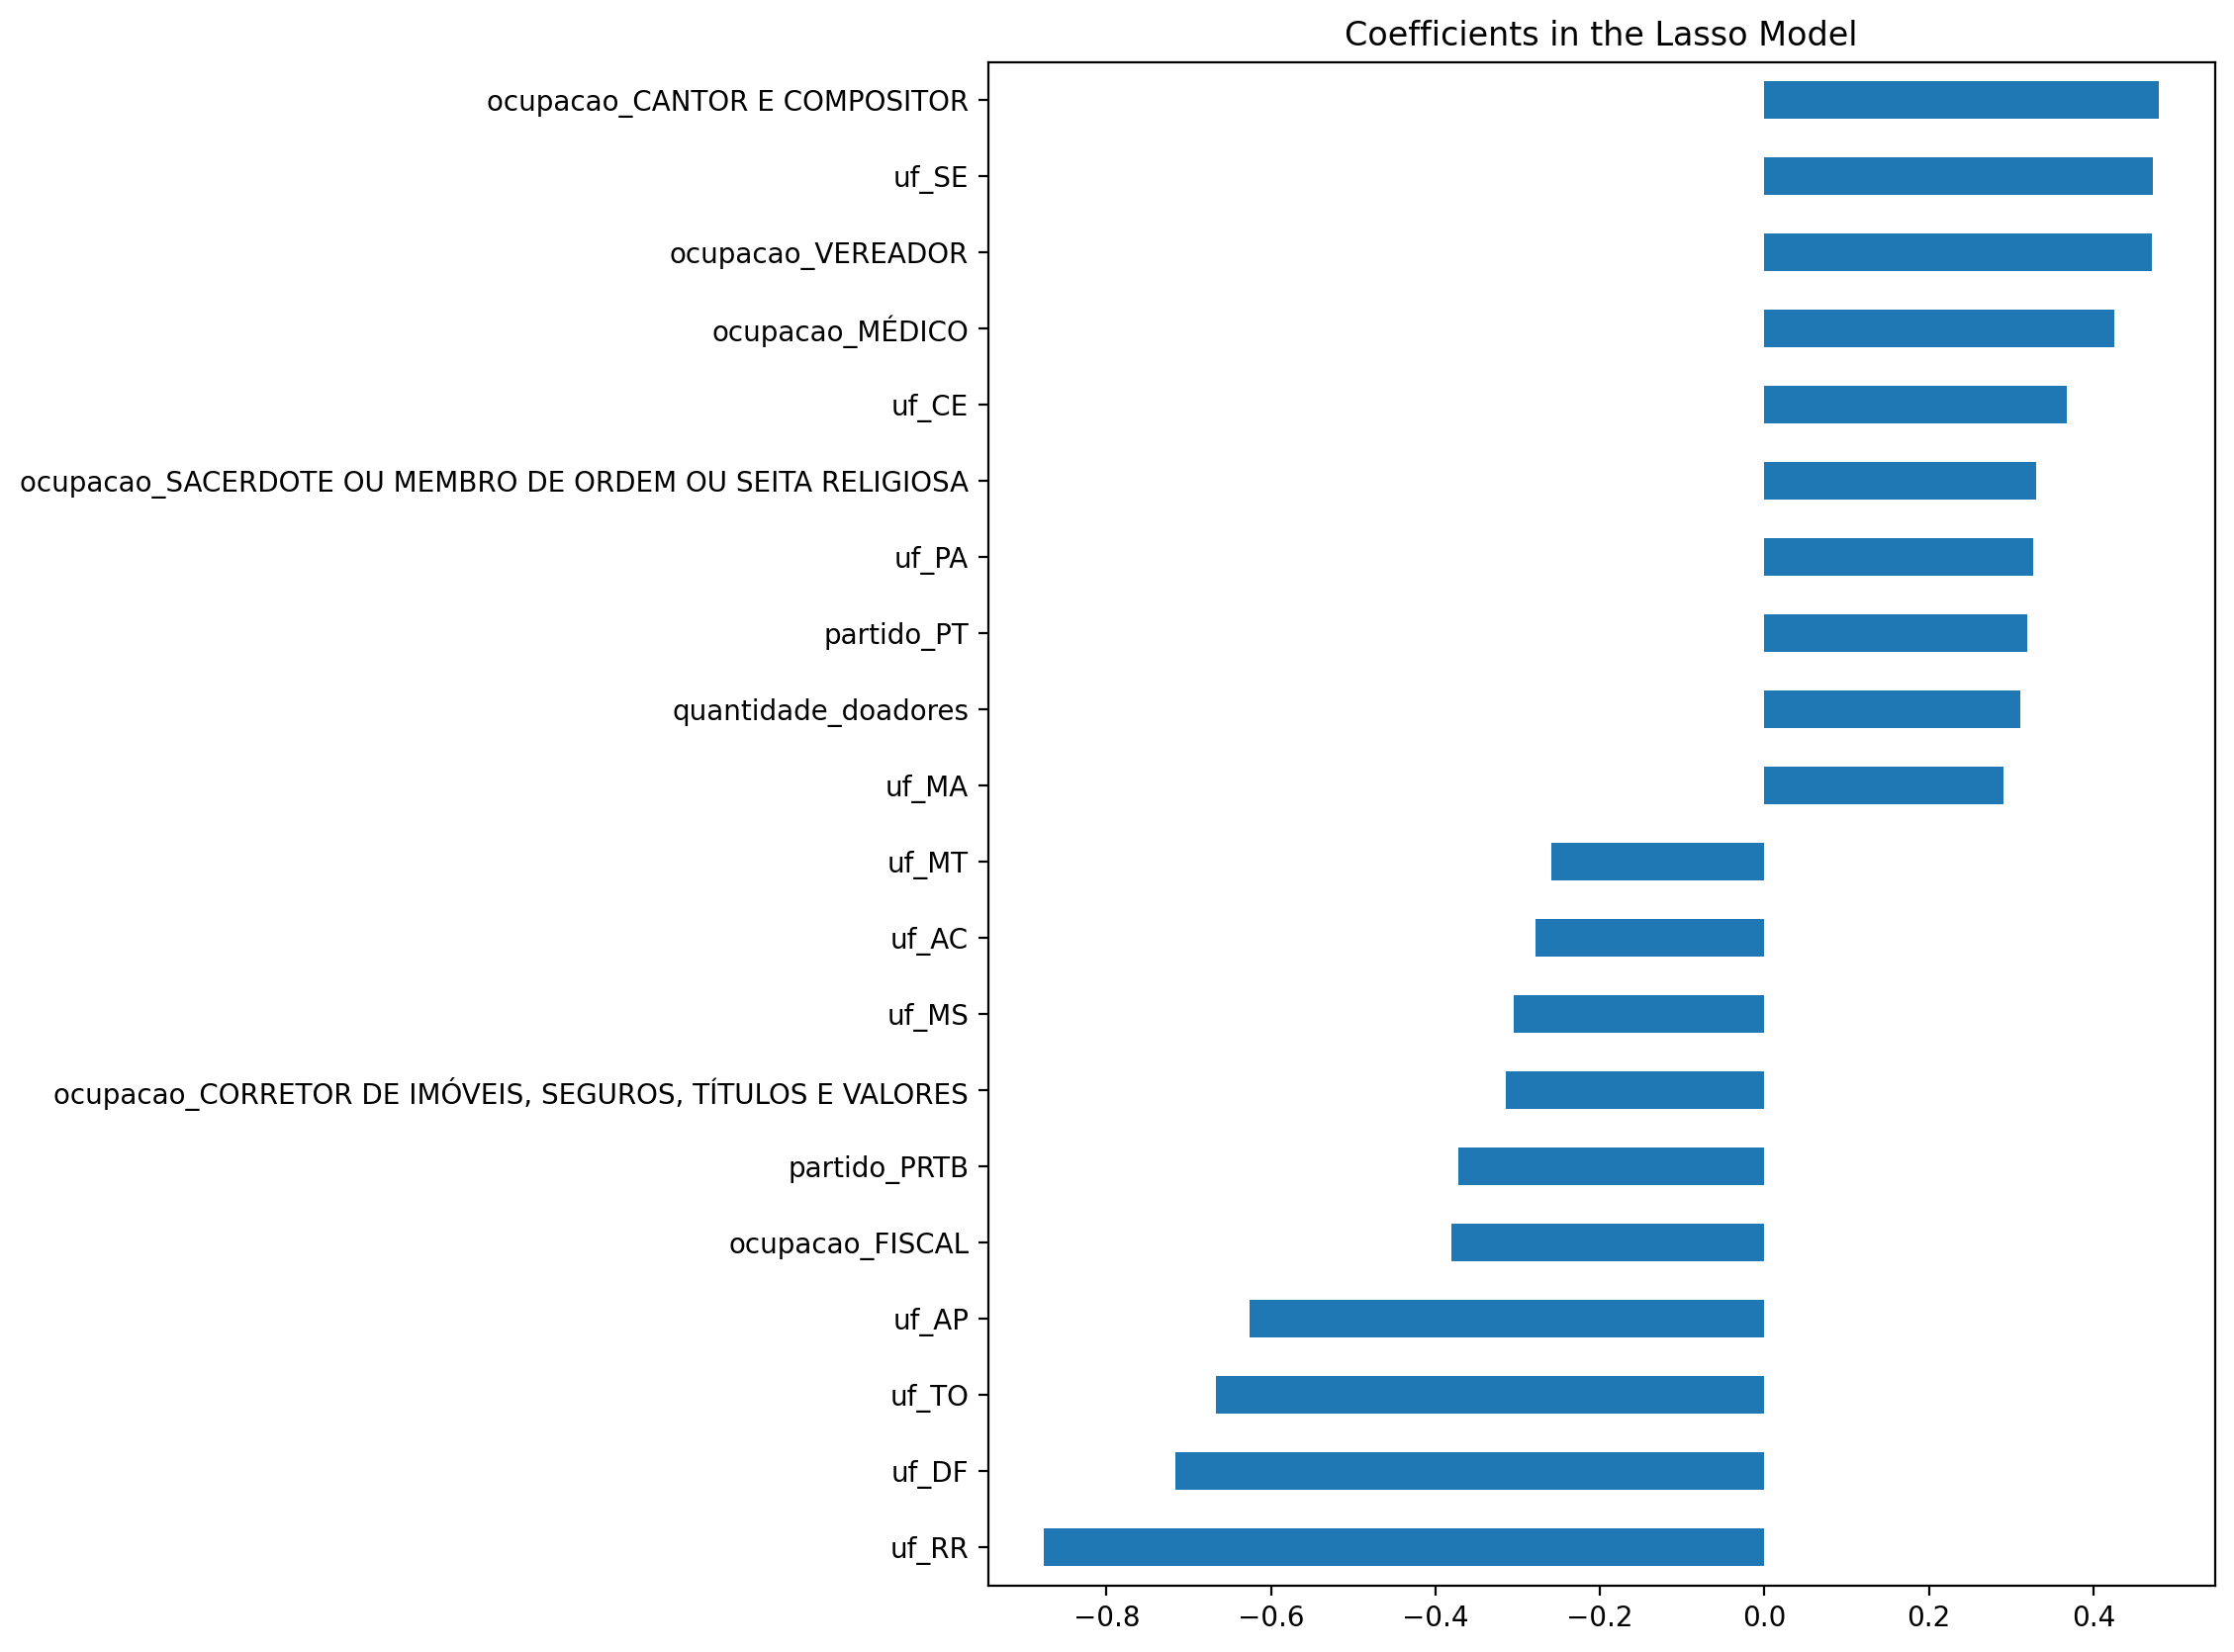

In [26]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

<AxesSubplot:xlabel='preds', ylabel='residuals'>

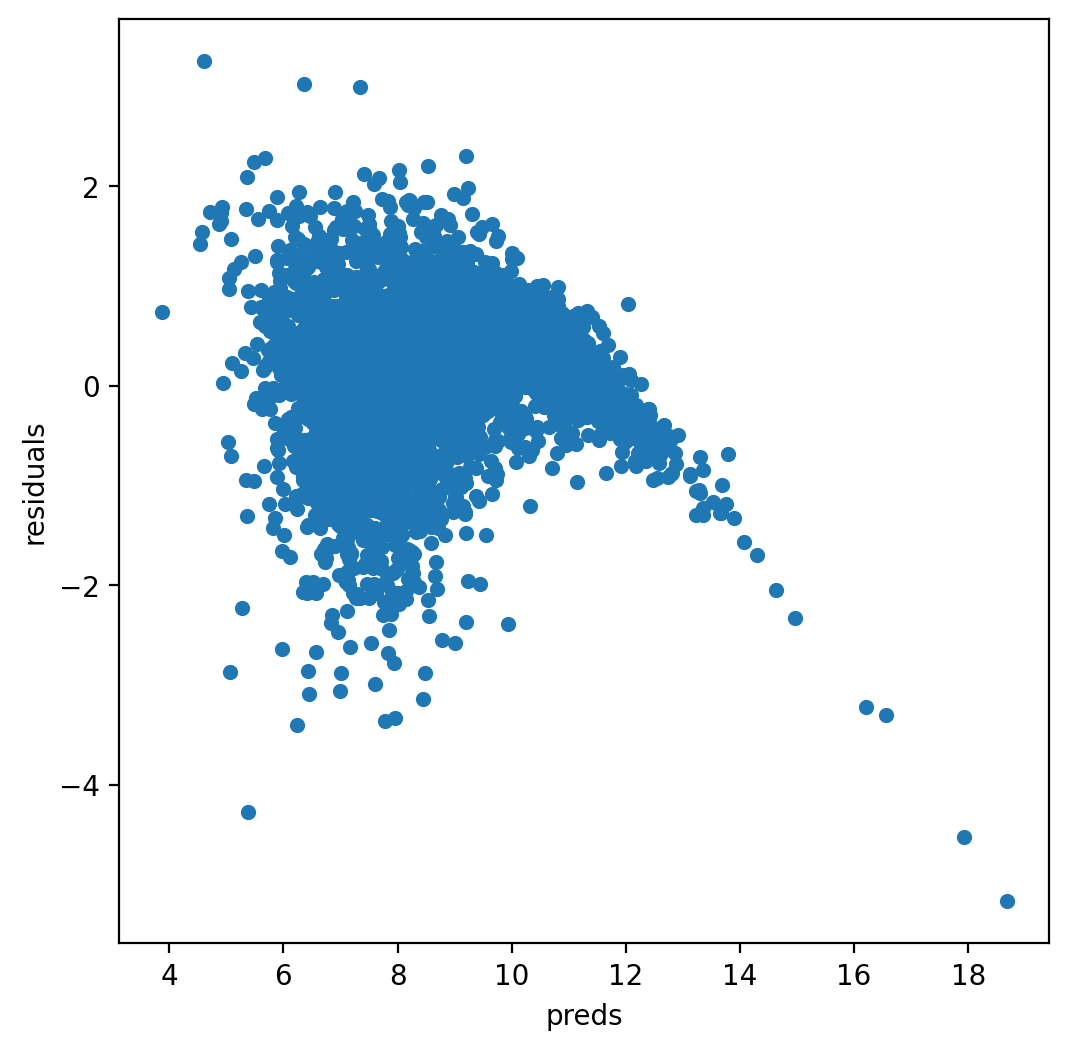

In [27]:
# lets look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true": y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")

In [28]:
#!pip install xgboost
import xgboost as xgb

In [29]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

<AxesSubplot:>

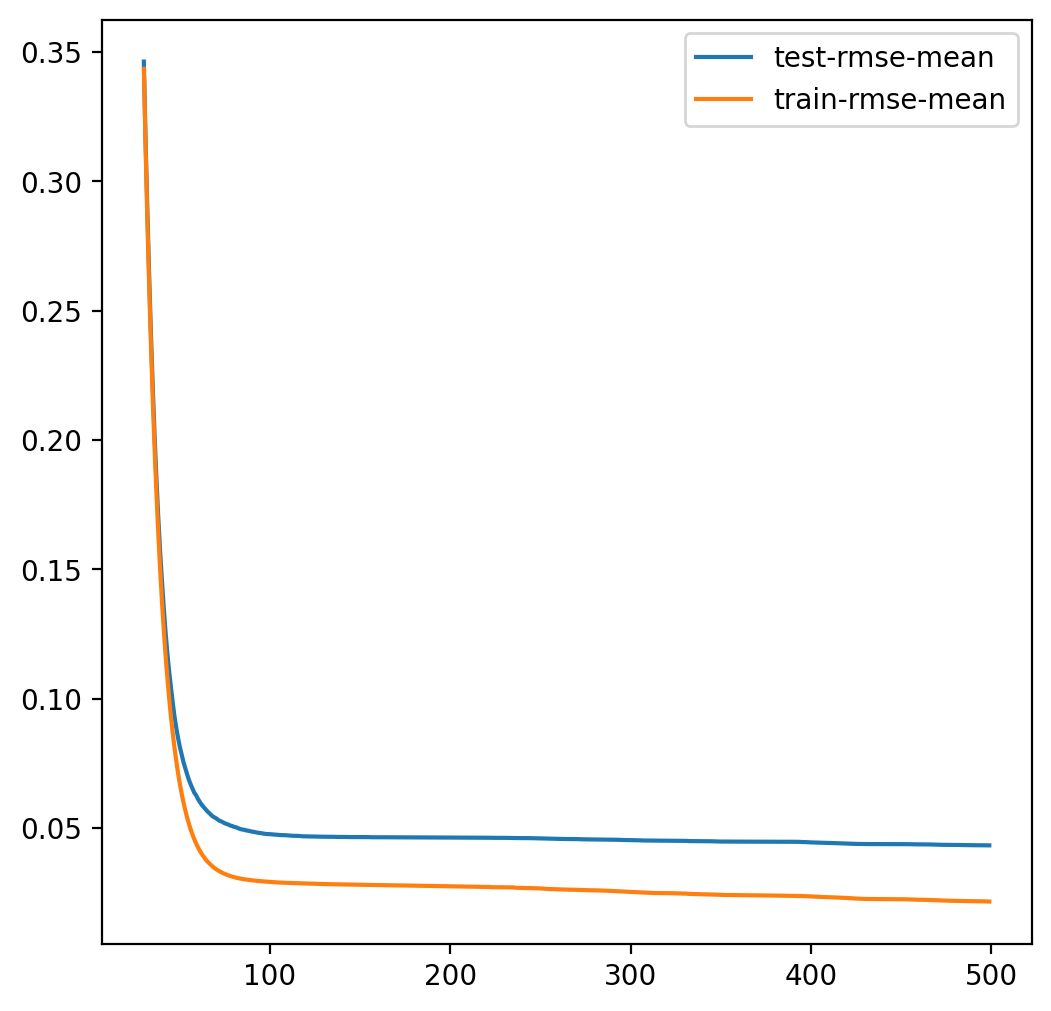

In [30]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [31]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=360, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

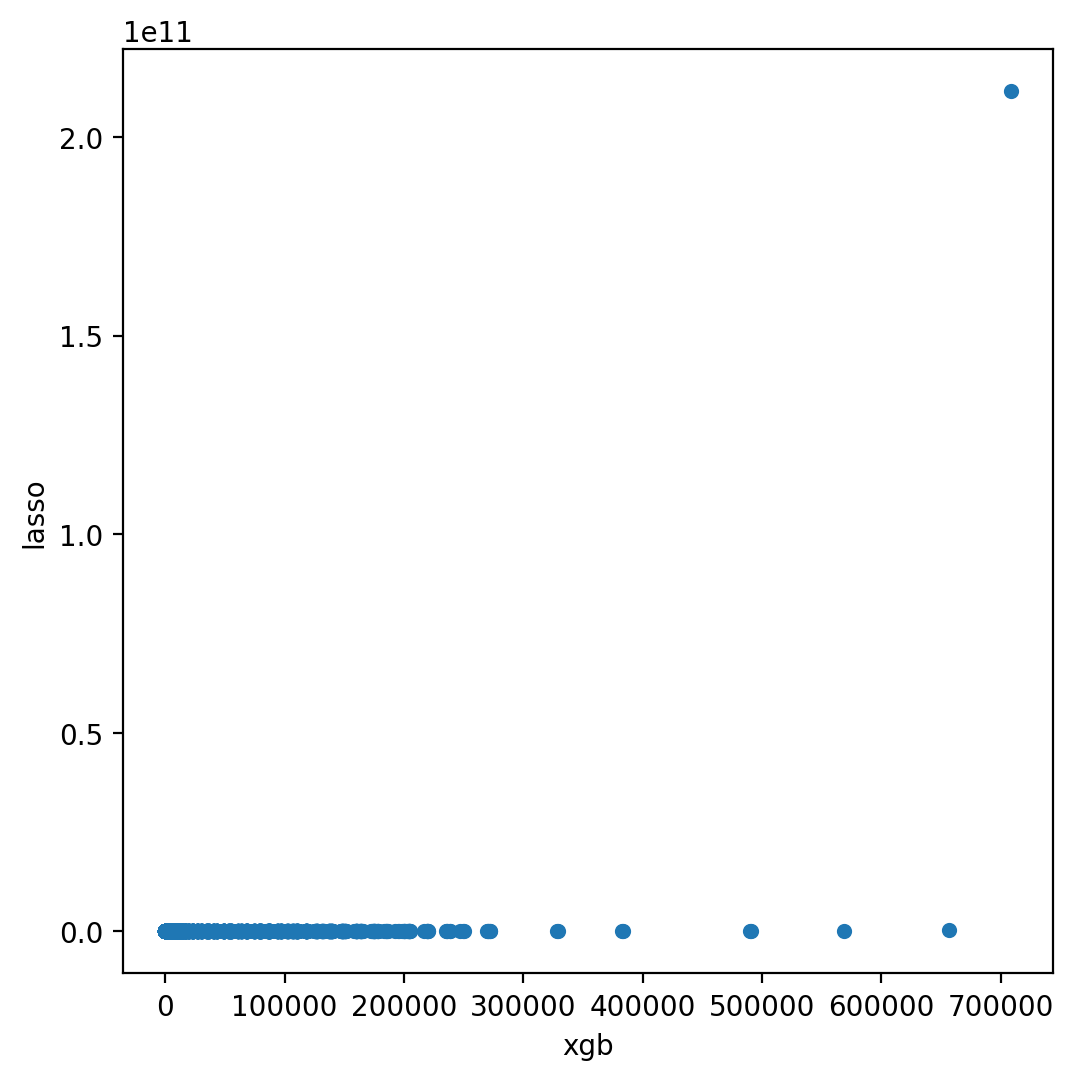

In [33]:
predictions = pd.DataFrame({"xgb": xgb_preds, "lasso":lasso_preds})
predictions.plot(x= "xgb", y = "lasso", kind = "scatter")

<AxesSubplot:>

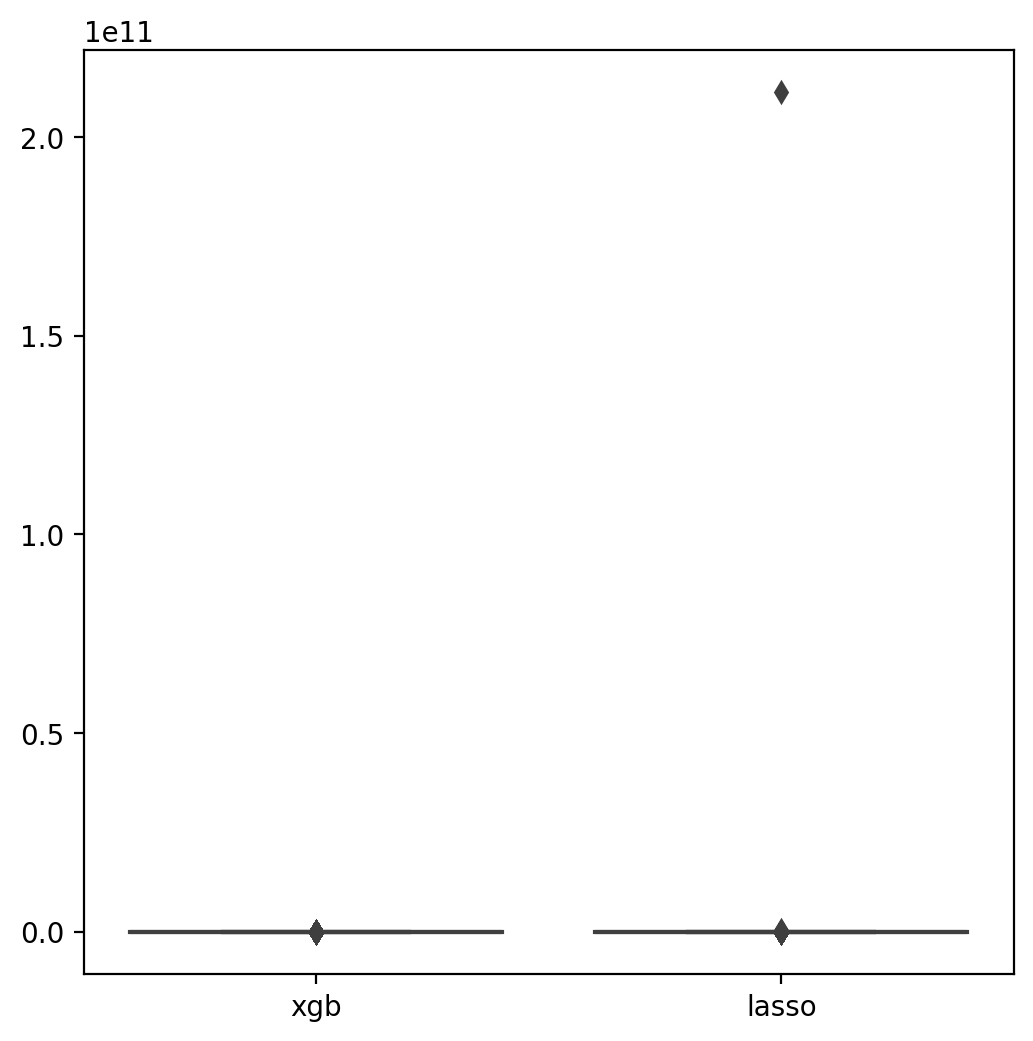

In [34]:
import seaborn as sns
sns.boxplot(predictions)

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

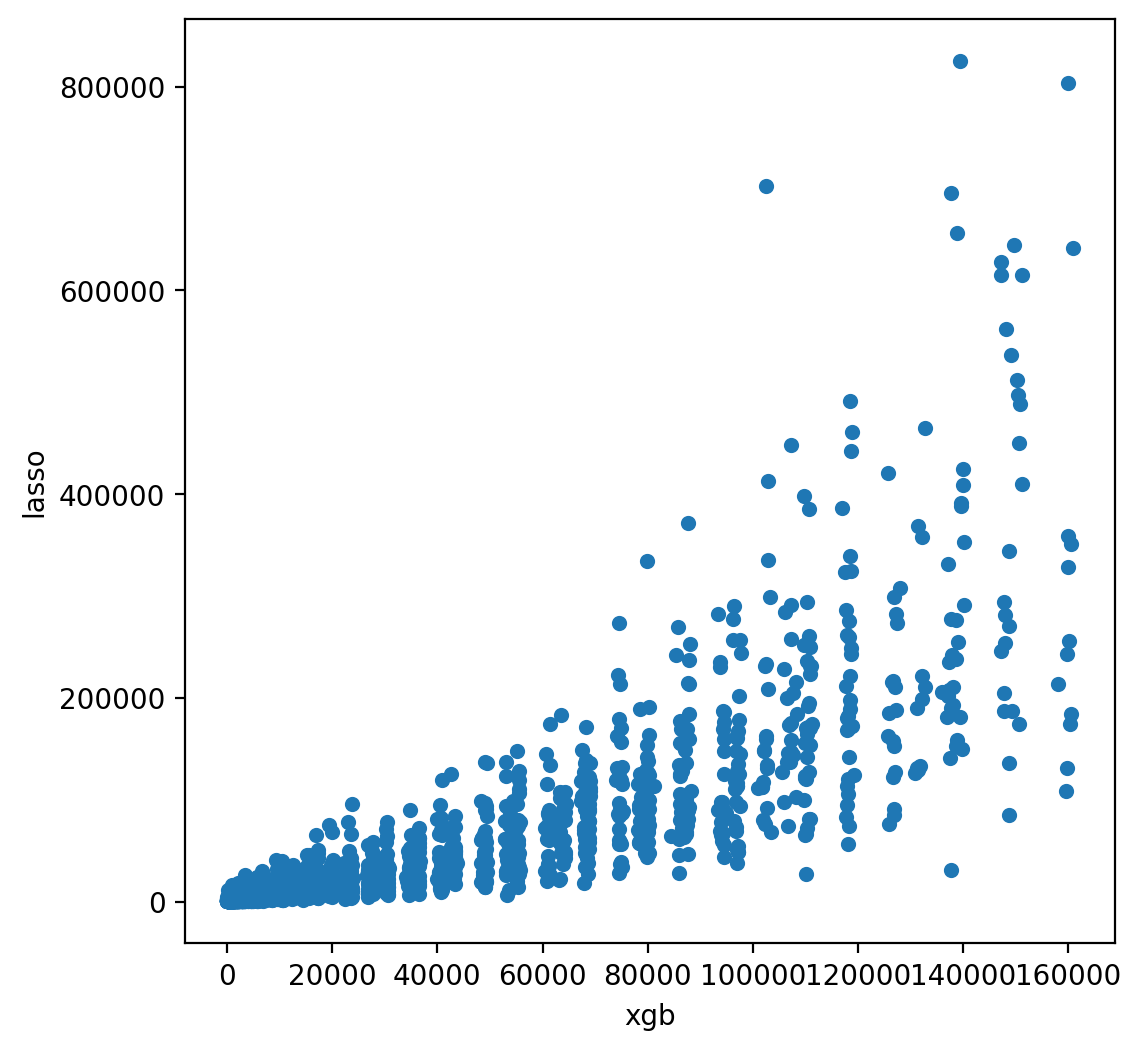

In [35]:
predictions = pd.DataFrame({"xgb": xgb_preds, "lasso":lasso_preds})
import numpy as np
from scipy import stats
predictions = predictions[(np.abs(stats.zscore(predictions)) < 3).all(axis=1)]
predictions.plot(x= "xgb", y = "lasso", kind = "scatter")

<AxesSubplot:>

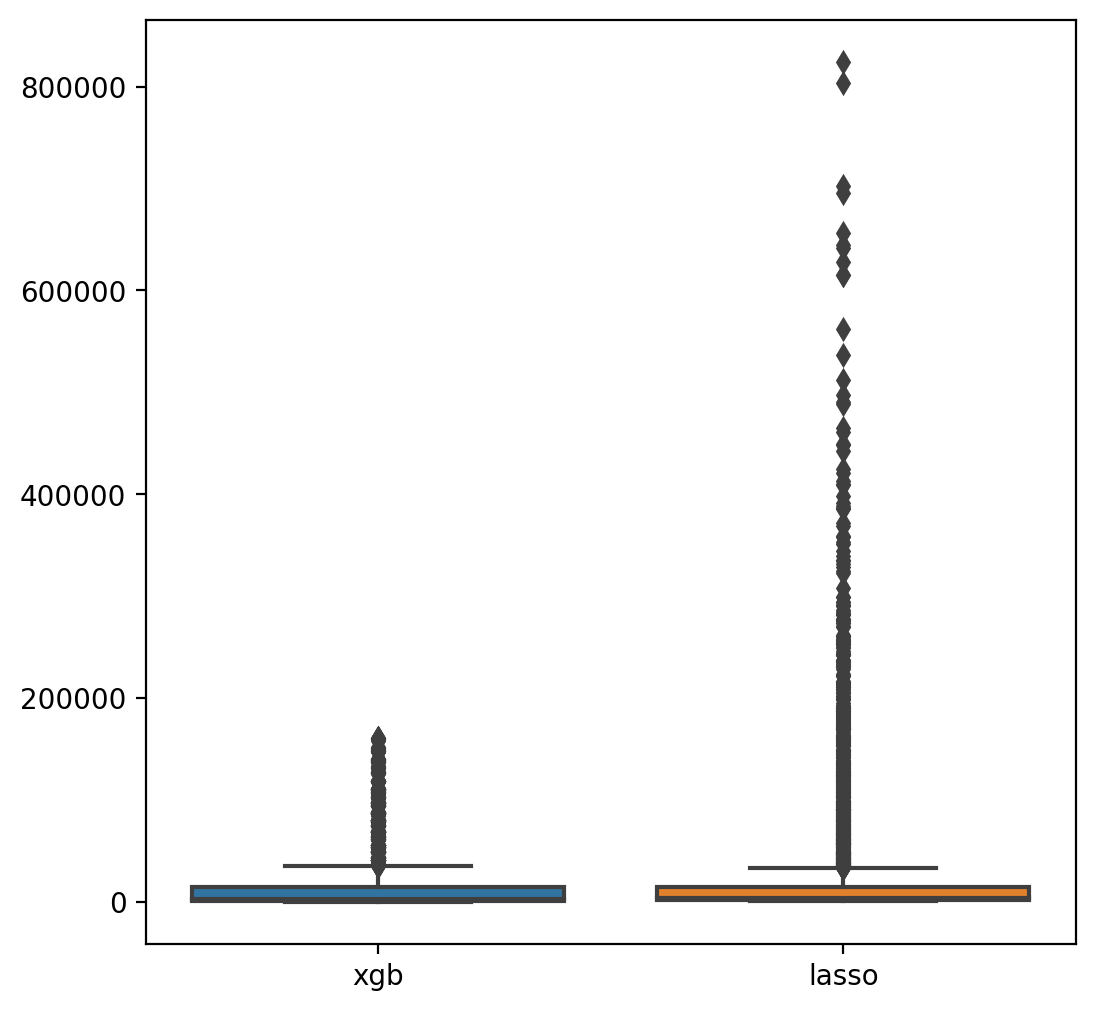

In [36]:
import seaborn as sns
sns.boxplot(predictions)

In [37]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [38]:
solution = pd.DataFrame({"nome":test.index, "votos":preds})
solution.to_csv("ridge_sol.csv", index = False)

In [39]:
solution

,nome,votos
0,ANTONIA LUCILEIA CRUZ RAMOS CAMARA,19112.964187
1,DEODATO NUNES DE FRANÇA,2860.302620
2,EDSON FIRMINO DE PAULA,740.984196
3,ELISABETH APARECIDA GARCIA RODRIGUES,703.126225
4,FLAVIANO FLAVIO BAPTISTA DE MELO,24566.820640
...,...,...
3937,ROBERTO PEREIRA URBANO,1638.786179
3938,RONALDO DIMAS NOGUEIRA PEREIRA,50426.822748
3939,SÉRGIO PERIN,601.197870
3940,ÍTALO MARCEL COSTA CONCEIÇÃO,648.608851


In [ ]:
Considerar outros modelos ainda não vistos em sala de sua escolha (e.g. SVR, Regression Trees, KNN e Random Florests).
Tentativa com SVR

In [18]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("data/eleicoes_2006_TREINO_CONFIGURADO_LIBRE.csv", index_col="nome")
del train['sequencial_candidato']
del train['cargo']
del train['ano']
train = pd.get_dummies(train)
train = train.fillna(train.mean())
X = train.loc[:,'quantidade_doacoes':'media_despesa']
y = train.loc[:,'votos']

In [22]:
test = pd.read_csv("data/eleicoes_2010_TESTE_CONFIGURADO_LIBRE.csv", index_col="nome")

del test['sequencial_candidato']
del test['cargo']
del test['ano']
test = pd.get_dummies(test)
test = test.fillna(test.mean())
X_test = train.loc[:,'quantidade_doacoes':'media_despesa']
y_test = train.loc[:,'votos']

In [20]:
clf = svm.SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
clf.fit(X, y)

SVR()

In [23]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

49690.173792601

In [32]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train, y, scoring = "neg_mean_squared_error", cv = 5 ))
    return (rmse)

In [33]:
rmse_cv(clf).mean()

48813.72929931288

<AxesSubplot:xlabel='preds', ylabel='residuals'>

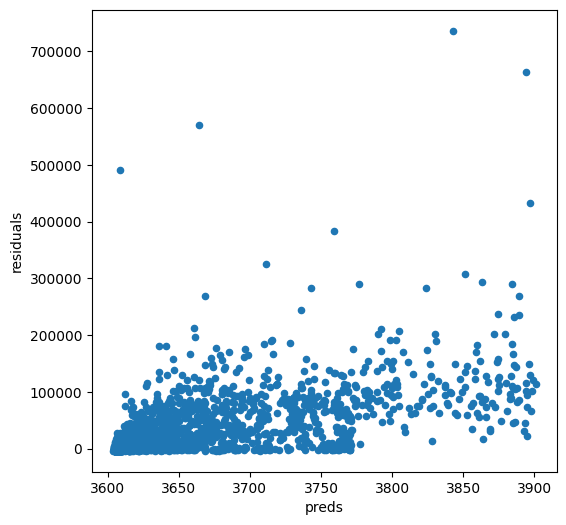

In [42]:
# lets look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":clf.predict(X_test), "true": y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")